# Data Analysis Pipeline - Interactive Notebook

This notebook version of the main pipeline allows for interactive execution and inline plot display. Perfect for development, debugging, and reviewing visualizations.

In [1]:
# Import required modules
from datetime import datetime
import random
import sys
import os
import importlib

# Add current directory to path to import modules
if os.getcwd() not in sys.path:
    sys.path.append(os.getcwd())

import modules.utils as utils
from modules.pipeline_manager import PipelineManager

# Force reload of pipeline_manager to ensure we get the latest version
importlib.reload(sys.modules['modules.pipeline_manager'])
from modules.pipeline_manager import PipelineManager

print("Modules imported and pipeline_manager reloaded")

Modules imported and pipeline_manager reloaded


In [2]:
# Configure matplotlib for notebook inline display
import matplotlib
import matplotlib.pyplot as plt

# Set backend for notebook display
%matplotlib inline
matplotlib.use('module://matplotlib_inline.backend_inline')

# Enable high-resolution plots
%config InlineBackend.figure_format = 'retina'

print("Matplotlib configured for notebook display")

Matplotlib configured for notebook display


## Configuration Section

Modify these settings for different runs. This section replaces the configuration from the original main.py file.

In [3]:
# === CONFIGURATION SECTION ===
# Easy to modify for different runs

# Generate run ID
current_datetime = datetime.now()
formatted_date = current_datetime.strftime('%Y%m%d')
random_4_digit_str = f"{random.randint(0, 9999):04d}"
run_id = f"{formatted_date}_{random_4_digit_str}"

# Subject Selection Options (uncomment one):
# Option 1: Specify subjects directly
subject_selection = "LCHR_MC01,LCHR_MC02"  # Comma-separated list
# subject_selection = "LCHR_MC01"  # Single subject

# Option 2: Use predefined groups (uncomment to use)
# subject_selection = "lchr_subjects"        # From subject_groups in YAML
# subject_selection = "all_2AFC"             # From subject_groups in YAML

# Option 3: Use all subjects from an experiment (uncomment to use)
# subject_selection = "session_config_list_2AFC"  # All subjects in this experiment

# Option 4: Use None to get all subjects for the experiment (uncomment to use)
# subject_selection = None

# Experiment configuration to use
experiment_config = "single_interval_discrimination"

# Pipeline control flags - set to True to skip steps
skip_extraction = False
skip_preprocessing = False
skip_loading = False  
skip_analysis = False
skip_visualization = False
skip_reporting = False  # Add this line to configuration

# Force flags - set to True to force re-processing
force_extraction = False
force_preprocessing = False

print(f"Pipeline run ID: {run_id}")
print(f"Subject selection: {subject_selection}")
print(f"Experiment config: {experiment_config}")

Pipeline run ID: 20250726_9439
Subject selection: LCHR_MC01,LCHR_MC02
Experiment config: single_interval_discrimination


## Pipeline Initialization

Initialize the pipeline manager and setup logging.

In [4]:
# Setup logging for entire application
import logging

# Clear existing loggers to prevent duplicate messages when running cells multiple times
def clear_existing_loggers():
    # Get the root logger
    root = logging.getLogger()
    
    # Remove all handlers from the root logger
    for handler in root.handlers[:]:
        root.removeHandler(handler)
    
    # Get all existing loggers and clear their handlers
    for logger_name in logging.root.manager.loggerDict:
        logger = logging.getLogger(logger_name)
        for handler in logger.handlers[:]:
            logger.removeHandler(handler)
    
    print("Cleared existing loggers")

# Clear existing loggers
clear_existing_loggers()

# Now set up the new logger
logger = utils.setup_logging(run_id)
logger.info("Notebook: === Data Analysis Pipeline Started ===")

# Initialize pipeline with config, experiment, and optional subjects
pipeline = PipelineManager(
    config_path='modules/config.yaml',
    experiment_config=experiment_config,
    subject_selection=subject_selection,
    run_id=run_id,
    logger=logger
)

# Show pipeline configuration
print(f"Config loaded from: {pipeline.config_manager.config_path}")
print(f"Available experiments: {list(pipeline.config.get('experiment_configs', {}).keys())}")
print(f"Available subjects: {list(pipeline.config.get('subjects', {}).keys())}")

# Get final subject list
subject_list = pipeline.get_subject_list()
print(f"Final subject list: {subject_list}")

Cleared existing loggers
2025-07-26 23:08:49,498 - 20250726_9439 - root - INFO - Notebook: === Data Analysis Pipeline Started ===
2025-07-26 23:08:49,499 - 20250726_9439 - root - INFO - PM: Initializing PipelineManager with run ID: 20250726_9439...
2025-07-26 23:08:49,500 - 20250726_9439 - root - INFO - CM: Initializing ConfigManager...
2025-07-26 23:08:49,499 - 20250726_9439 - root - INFO - PM: Initializing PipelineManager with run ID: 20250726_9439...
2025-07-26 23:08:49,500 - 20250726_9439 - root - INFO - CM: Initializing ConfigManager...
2025-07-26 23:08:49,519 - 20250726_9439 - root - INFO - CM: Loaded config from: modules/config.yaml
2025-07-26 23:08:49,519 - 20250726_9439 - root - INFO - CM: Config loaded successfully
2025-07-26 23:08:49,519 - 20250726_9439 - root - INFO - CM: Parsed subject selection: ['LCHR_MC01', 'LCHR_MC02']
2025-07-26 23:08:49,519 - 20250726_9439 - root - INFO - CM: Validating experiment config 'single_interval_discrimination'...
2025-07-26 23:08:49,519 - 2

## Step 1: Session Extraction

Extract raw session data from source files.

In [5]:
# Run session extraction if not skipped
if not skip_extraction:
    logger.info("Notebook: Starting session extraction pipeline step...")
    try:
        pipeline.initialize_session_extractor(force=force_extraction)
        pipeline.extract_sessions(force=force_extraction)
        logger.info("Notebook: Session extraction pipeline step completed")
        print("✓ Session extraction completed successfully")
    except Exception as e:
        logger.error(f"Notebook: Session extraction pipeline step failed: {str(e)}")
        print(f"✗ Session extraction failed: {str(e)}")
else:
    logger.info("Notebook: Skipping session extraction")
    print("→ Skipping session extraction")

2025-07-26 23:08:50,567 - 20250726_9439 - root - INFO - Notebook: Starting session extraction pipeline step...
2025-07-26 23:08:50,567 - 20250726_9439 - root - INFO - SE: Initializing SessionExtractor...
2025-07-26 23:08:50,567 - 20250726_9439 - root - INFO - SE: SessionExtractor initialized successfully
2025-07-26 23:08:50,567 - 20250726_9439 - root - INFO - SE: Starting batch extraction for 2 subjects
2025-07-26 23:08:50,567 - 20250726_9439 - root - INFO - SE: Initializing SessionExtractor...
2025-07-26 23:08:50,567 - 20250726_9439 - root - INFO - SE: SessionExtractor initialized successfully
2025-07-26 23:08:50,567 - 20250726_9439 - root - INFO - SE: Starting batch extraction for 2 subjects


Extracting LCHR_MC02: 100%|██████████| 2/2 [00:00<?, ?it/s]

2025-07-26 23:08:50,604 - 20250726_9439 - root - INFO - SE: Batch extraction completed
2025-07-26 23:08:50,605 - 20250726_9439 - root - INFO - Notebook: Session extraction pipeline step completed
✓ Session extraction completed successfully
2025-07-26 23:08:50,605 - 20250726_9439 - root - INFO - Notebook: Session extraction pipeline step completed
✓ Session extraction completed successfully


## Step 2: Session Preprocessing

Preprocess and clean the extracted session data.

In [6]:
# Run session preprocessing if not skipped
if not skip_preprocessing:
    logger.info("Notebook: Starting session preprocessing pipeline step...")
    try:
        pipeline.initialize_session_preprocessor(force=force_preprocessing)
        pipeline.preprocess_sessions(force=force_preprocessing)
        logger.info("Notebook: Session preprocessing pipeline step completed")
        print("✓ Session preprocessing completed successfully")
    except Exception as e:
        logger.error(f"Notebook: Session preprocessing pipeline step failed: {str(e)}")
        print(f"✗ Session preprocessing failed: {str(e)}")
else:
    logger.info("Notebook: Skipping session preprocessing")
    print("→ Skipping session preprocessing")

2025-07-26 23:08:50,616 - 20250726_9439 - root - INFO - Notebook: Starting session preprocessing pipeline step...
2025-07-26 23:08:50,617 - 20250726_9439 - root - INFO - SP: Initializing GeneralSessionPreprocessor...
2025-07-26 23:08:50,618 - 20250726_9439 - root - INFO - SP: Loading experiment-specific preprocessor: SingleIntervalDiscriminationPreprocessor from single_interval_discrimination_preprocessor
2025-07-26 23:08:50,620 - 20250726_9439 - root - INFO - SP-SID: Initializing SingleIntervalDiscriminationPreprocessor...
2025-07-26 23:08:50,621 - 20250726_9439 - root - INFO - SP-SID: SingleIntervalDiscriminationPreprocessor initialized successfully
2025-07-26 23:08:50,622 - 20250726_9439 - root - INFO - SP: Successfully loaded experiment-specific preprocessor: SingleIntervalDiscriminationPreprocessor
2025-07-26 23:08:50,623 - 20250726_9439 - root - INFO - SP: GeneralSessionPreprocessor initialized successfully
2025-07-26 23:08:50,617 - 20250726_9439 - root - INFO - SP: Initializing 

Preprocessing LCHR_MC01: 100%|██████████| 2/2 [00:00<?, ?it/s]

2025-07-26 23:08:50,629 - 20250726_9439 - root - INFO - SP: Processing subject LCHR_MC02



Preprocessing LCHR_MC02: 100%|██████████| 2/2 [00:00<?, ?it/s]

2025-07-26 23:08:50,629 - 20250726_9439 - root - INFO - SP: Batch preprocessing completed
2025-07-26 23:08:50,629 - 20250726_9439 - root - INFO - Notebook: Session preprocessing pipeline step completed
✓ Session preprocessing completed successfully
2025-07-26 23:08:50,629 - 20250726_9439 - root - INFO - Notebook: Session preprocessing pipeline step completed
✓ Session preprocessing completed successfully


## Step 3: Data Loading

Load preprocessed data into memory for analysis.

In [7]:
# Load preprocessed data if not skipped
loaded_data = None

if not skip_loading:
    logger.info("Notebook: Starting data loading pipeline step...")
    try:
        pipeline.initialize_data_loader()
        loaded_data = pipeline.load_data()
        logger.info("Notebook: Data loading pipeline step completed")
        
        # Log summary of loaded data
        metadata = loaded_data['metadata']
        logger.info(f"Notebook: Loaded {metadata['total_sessions_loaded']}/{metadata['total_sessions_requested']} sessions from {metadata['subjects_loaded']}/{metadata['subjects_requested']} subjects")
        
        print("✓ Data loading completed successfully")
        print(f"  → Loaded {metadata['total_sessions_loaded']}/{metadata['total_sessions_requested']} sessions")
        print(f"  → From {metadata['subjects_loaded']}/{metadata['subjects_requested']} subjects")
        
    except Exception as e:
        logger.error(f"Notebook: Data loading pipeline step failed: {str(e)}")
        print(f"✗ Data loading failed: {str(e)}")
else:
    logger.info("Notebook: Skipping data loading")
    print("→ Skipping data loading")

2025-07-26 23:08:50,651 - 20250726_9439 - root - INFO - Notebook: Starting data loading pipeline step...
2025-07-26 23:08:50,651 - 20250726_9439 - root - INFO - DL: Initializing DataLoader...
2025-07-26 23:08:50,651 - 20250726_9439 - root - INFO - DL: DataLoader initialized successfully
2025-07-26 23:08:50,651 - 20250726_9439 - root - INFO - DL: Loading data for 2 subjects
2025-07-26 23:08:50,662 - 20250726_9439 - root - INFO - DL: Loading sessions for subject LCHR_MC01
2025-07-26 23:08:50,651 - 20250726_9439 - root - INFO - DL: Initializing DataLoader...
2025-07-26 23:08:50,651 - 20250726_9439 - root - INFO - DL: DataLoader initialized successfully
2025-07-26 23:08:50,651 - 20250726_9439 - root - INFO - DL: Loading data for 2 subjects
2025-07-26 23:08:50,662 - 20250726_9439 - root - INFO - DL: Loading sessions for subject LCHR_MC01
2025-07-26 23:08:50,844 - 20250726_9439 - root - INFO - DL: Session dates before sorting: ['20250416', '20250417']
2025-07-26 23:08:50,846 - 20250726_9439 

## Step 4: Data Analysis

Analyze the loaded data to generate analysis results.

In [8]:
# Run data analysis if not skipped
analysis_results = None

if not skip_analysis and loaded_data is not None:
    logger.info("Notebook: Starting data analysis pipeline step...")
    try:
        pipeline.initialize_data_analyzer(loaded_data)
        analysis_results = pipeline.analyze_data(loaded_data)
        logger.info("Notebook: Data analysis pipeline step completed")
        
        # Log summary of analysis results
        subjects_analyzed = analysis_results.get('subjects_analyzed', 0)
        logger.info(f"Notebook: Analysis completed for {subjects_analyzed} subjects")
        
        print("✓ Data analysis completed successfully")
        print(f"  → Analysis completed for {subjects_analyzed} subjects")
        
    except Exception as e:
        logger.error(f"Notebook: Data analysis pipeline step failed: {str(e)}")
        print(f"✗ Data analysis failed: {str(e)}")
else:
    if loaded_data is None:
        logger.info("Notebook: Skipping analysis - no data loaded")
        print("→ Skipping analysis - no data loaded")
    else:
        logger.info("Notebook: Skipping data analysis")
        print("→ Skipping data analysis")

2025-07-26 23:08:51,082 - 20250726_9439 - root - INFO - Notebook: Starting data analysis pipeline step...
2025-07-26 23:08:51,082 - 20250726_9439 - root - INFO - DA: Initializing GeneralDataAnalyzer...
2025-07-26 23:08:51,082 - 20250726_9439 - root - INFO - DA: Loading experiment-specific analyzer: SingleIntervalDiscriminationAnalyzer from single_interval_discrimination_analyzer
2025-07-26 23:08:51,095 - 20250726_9439 - root - INFO - DA-SID: Initializing SingleIntervalDiscriminationAnalyzer...
2025-07-26 23:08:51,095 - 20250726_9439 - root - INFO - DA-SID: SingleIntervalDiscriminationAnalyzer initialized successfully
2025-07-26 23:08:51,095 - 20250726_9439 - root - INFO - DA: Successfully loaded experiment-specific analyzer: SingleIntervalDiscriminationAnalyzer
2025-07-26 23:08:51,082 - 20250726_9439 - root - INFO - DA: Initializing GeneralDataAnalyzer...
2025-07-26 23:08:51,082 - 20250726_9439 - root - INFO - DA: Loading experiment-specific analyzer: SingleIntervalDiscriminationAnalyz

## Step 5: Visualization Generation

Generate visualizations from analysis results. Plots will appear inline below.

2025-07-26 23:08:51,145 - 20250726_9439 - root - INFO - Notebook: Starting visualization pipeline step...
2025-07-26 23:08:51,145 - 20250726_9439 - root - INFO - VZ: Initializing GeneralVisualizer...
2025-07-26 23:08:51,161 - 20250726_9439 - root - INFO - VZ: Created output directory for subject LCHR_MC01
2025-07-26 23:08:51,163 - 20250726_9439 - root - INFO - VZ: Created output directory for subject LCHR_MC02
2025-07-26 23:08:51,164 - 20250726_9439 - root - INFO - VZ: Spyder mode - using existing backend: module://matplotlib_inline.backend_inline
2025-07-26 23:08:51,165 - 20250726_9439 - root - INFO - VZ: Spyder mode - using non-interactive matplotlib
2025-07-26 23:08:51,166 - 20250726_9439 - root - INFO - VZ: Loading experiment-specific visualizer: SingleIntervalDiscriminationVisualizer from single_interval_discrimination_visualizer
2025-07-26 23:08:51,145 - 20250726_9439 - root - INFO - VZ: Initializing GeneralVisualizer...
2025-07-26 23:08:51,161 - 20250726_9439 - root - INFO - VZ:

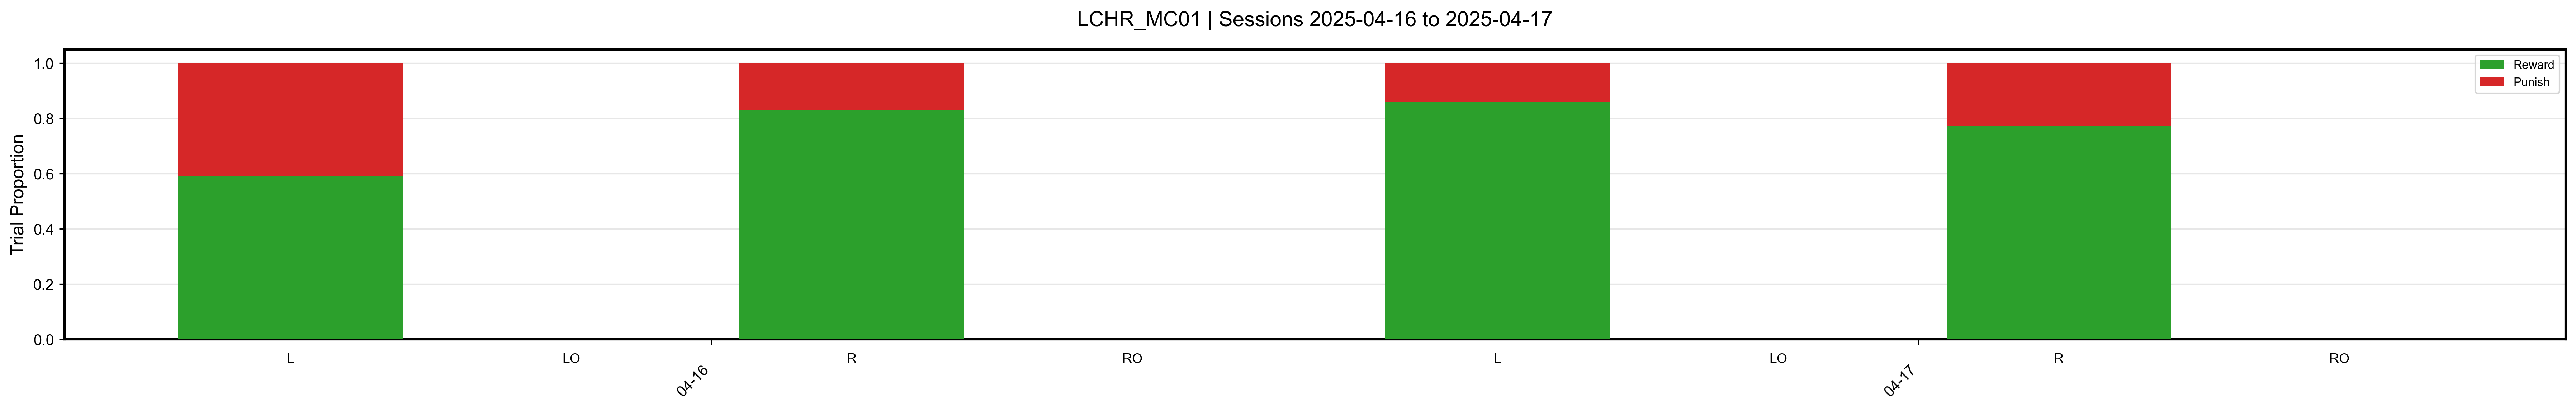

2025-07-26 23:08:52,846 - 20250726_9439 - root - INFO - Notebook: Displaying figure 2


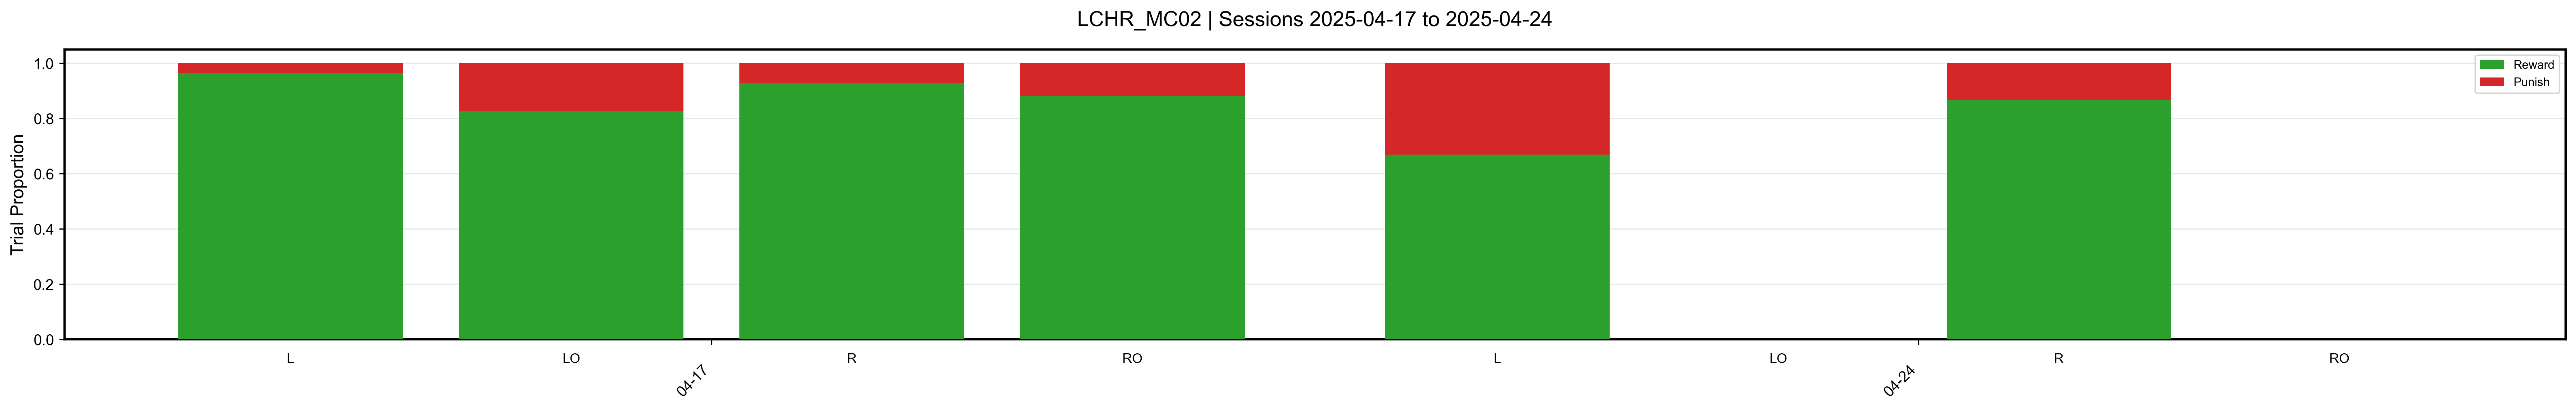

2025-07-26 23:08:53,148 - 20250726_9439 - root - INFO - Notebook: Visualization pipeline step completed
2025-07-26 23:08:53,148 - 20250726_9439 - root - INFO - Notebook: Generated 2 figures
✓ Visualization generation completed successfully
  → Generated 2 figures
  → Displayed 2 figures with show_override=True
  → Other figures saved to output directories
2025-07-26 23:08:53,148 - 20250726_9439 - root - INFO - Notebook: Generated 2 figures
✓ Visualization generation completed successfully
  → Generated 2 figures
  → Displayed 2 figures with show_override=True
  → Other figures saved to output directories


In [9]:
# Generate visualizations if not skipped
visualization_results = None

if not skip_visualization and analysis_results is not None:
    logger.info("Notebook: Starting visualization pipeline step...")
    try:
        pipeline.initialize_visualizer(analysis_results)
        
        # Configure matplotlib for controlled display
        import matplotlib
        import matplotlib.pyplot as plt
        %matplotlib inline
        matplotlib.use('module://matplotlib_inline.backend_inline')
        plt.ioff()  # Turn off interactive mode to prevent auto-display
        
        # Store figures to display only when show_override=True
        figures_to_show = []
        
        # Custom show_figure that respects show_override and prevents auto-display
        def notebook_show_figure(fig, show_override=None):
            logger.info(f"Notebook: show_figure called with show_override={show_override}")
            should_show = show_override if show_override is not None else False
            if should_show:
                logger.info(f"Notebook: Adding figure to display list")
                figures_to_show.append(fig)
            else:
                logger.info(f"Notebook: Not displaying figure (show_override={show_override})")
                # Close the figure to prevent it from appearing at the end
                plt.close(fig)
        
        # Monkey patch show_figure and disable plt.show()
        original_show_figure = pipeline.visualizer.show_figure
        original_show = plt.show
        original_close = plt.close
        
        plt.show = lambda *args, **kwargs: None  # Disable plt.show()
        plt.close = lambda fig=None: original_close(fig) if fig else None  # Allow selective closing
        pipeline.visualizer.show_figure = notebook_show_figure
        
        logger.info(f"Notebook: Starting visualization generation...")
        visualization_results = pipeline.generate_visualizations(analysis_results)
        
        logger.info(f"Notebook: Found {len(figures_to_show)} figures to display")
        
        # Display only the figures that should be shown
        from IPython.display import display
        for i, fig in enumerate(figures_to_show):
            logger.info(f"Notebook: Displaying figure {i+1}")
            display(fig)
            plt.close(fig)  # Close after displaying to free memory
        
        # Restore original functions
        plt.show = original_show
        plt.close = original_close
        pipeline.visualizer.show_figure = original_show_figure
        plt.ion()  # Turn interactive mode back on
        
        logger.info("Notebook: Visualization pipeline step completed")
        
        # Log summary of visualization results
        figures_generated = visualization_results.get('figures_generated', 0)
        logger.info(f"Notebook: Generated {figures_generated} figures")
        
        print("✓ Visualization generation completed successfully")
        print(f"  → Generated {figures_generated} figures")
        print(f"  → Displayed {len(figures_to_show)} figures with show_override=True")
        print(f"  → Other figures saved to output directories")
        
    except Exception as e:
        logger.error(f"Notebook: Visualization pipeline step failed: {str(e)}")
        print(f"✗ Visualization generation failed: {str(e)}")
        # Restore functions even if there's an error
        if 'original_show' in locals():
            plt.show = original_show
        if 'original_close' in locals():
            plt.close = original_close
        if 'original_show_figure' in locals():
            pipeline.visualizer.show_figure = original_show_figure
        plt.ion()
else:
    if analysis_results is None:
        logger.info("Notebook: Skipping visualization - no analysis results")
        print("→ Skipping visualization - no analysis results")
    else:
        logger.info("Notebook: Skipping visualization")
        print("→ Skipping visualization")

## Step 6: Report Generation

Generate comprehensive reports from analysis results.

In [ ]:
# Generate reports if not skipped
report_results = None

if not skip_reporting and analysis_results is not None:
    logger.info("Notebook: Starting report generation pipeline step...")
    try:
        pipeline.initialize_report_generator(analysis_results)
        report_results = pipeline.generate_reports(analysis_results)
        logger.info("Notebook: Report generation pipeline step completed")
        
        # Log summary of report results
        reports_generated = report_results.get('reports_generated', 0)
        logger.info(f"Notebook: Generated {reports_generated} reports")
        
        print("✓ Report generation completed successfully")
        print(f"  → Generated {reports_generated} reports")
        print(f"  → Check 'output/reports/' directory for generated reports")
        
    except Exception as e:
        logger.error(f"Notebook: Report generation pipeline step failed: {str(e)}")
        print(f"✗ Report generation failed: {str(e)}")
else:
    if analysis_results is None:
        logger.info("Notebook: Skipping report generation - no analysis results")
        print("→ Skipping report generation - no analysis results")
    else:
        logger.info("Notebook: Skipping report generation")
        print("→ Skipping report generation")

In [10]:
# Pipeline completion summary
print("\n" + "="*50)
print("PIPELINE EXECUTION SUMMARY")
print("="*50)

print(f"Run ID: {run_id}")
print(f"Subjects processed: {subject_list}")
print(f"Experiment config: {experiment_config}")

steps_completed = []
if not skip_extraction:
    steps_completed.append("Session Extraction")
if not skip_preprocessing:
    steps_completed.append("Session Preprocessing") 
if not skip_loading and loaded_data is not None:
    steps_completed.append("Data Loading")
if not skip_analysis and analysis_results is not None:
    steps_completed.append("Data Analysis")
if not skip_visualization and visualization_results is not None:
    steps_completed.append("Visualization Generation")
if not skip_reporting and report_results is not None:
    steps_completed.append("Report Generation")

print(f"Steps completed: {', '.join(steps_completed)}")

if visualization_results:
    print(f"Figures generated: {visualization_results.get('figures_generated', 0)}")
    print("Check 'output/figures/' directory for saved visualizations")
if report_results:
    print(f"Reports generated: {report_results.get('reports_generated', 0)}")
    print("Check 'output/reports/' directory for saved reports")

print("="*50)
logger.info("Notebook: === Data Analysis Pipeline Completed ===")


PIPELINE EXECUTION SUMMARY
Run ID: 20250726_9439
Subjects processed: ['LCHR_MC01', 'LCHR_MC02']
Experiment config: single_interval_discrimination
Steps completed: Session Extraction, Session Preprocessing, Data Loading, Data Analysis, Visualization Generation
Figures generated: 2
Check 'output/figures/' directory for saved visualizations
2025-07-26 23:08:53,172 - 20250726_9439 - root - INFO - Notebook: === Data Analysis Pipeline Completed ===


## Imaging Preprocessing Pipeline (Optional)

Run imaging preprocessing pipeline for subjects with imaging data. This is Pipeline 2b - processing Suite2p results into analysis-ready data with QC validation.

In [ ]:
# === IMAGING PREPROCESSING PIPELINE ===
# Set to True to run imaging preprocessing
run_imaging_preprocessing = True

if run_imaging_preprocessing:
    logger.info("Notebook: Starting imaging preprocessing pipeline...")
    
    try:
        # Import imaging pipeline manager
        from modules.imaging_pipeline_manager import ImagingPipelineManager
        
        # Initialize imaging pipeline
        imaging_pipeline = ImagingPipelineManager(
            config_path='modules/config.yaml',
            experiment_config=experiment_config,
            subject_selection=subject_selection,  # Use same subject selection as main pipeline
            run_id=f"{run_id}_imaging",
            logger=logger
        )
        
        # Check if any subjects have imaging data
        if not imaging_pipeline.subject_list:
            print("→ No subjects with imaging sessions found - skipping imaging preprocessing")
        else:
            print(f"Found {len(imaging_pipeline.subject_list)} subjects with imaging data: {imaging_pipeline.subject_list}")
            
            # Run complete imaging preprocessing pipeline
            imaging_results = imaging_pipeline.run_complete_pipeline(force=force_preprocessing)
            
            print("\n🎯 IMAGING PREPROCESSING CHECKPOINT REACHED")
            print("Review the checkpoint report above to determine if data quality is sufficient for neural analysis.")
            print("Check the generated QC plots and reports in the imaging session directories.")
            
            # Store results for potential use in main pipeline
            globals()['imaging_preprocessing_results'] = imaging_results
            
    except Exception as e:
        logger.error(f"Notebook: Imaging preprocessing pipeline failed: {str(e)}")
        print(f"✗ Imaging preprocessing failed: {str(e)}")
else:
    logger.info("Notebook: Skipping imaging preprocessing pipeline")
    print("→ Skipping imaging preprocessing pipeline")